# Prediction

***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, \
                            max_error, explained_variance_score

In [2]:
# Define function for evaluation
def evaluate(y_te, pred, return_data = False):
    
    df = pd.DataFrame({"mean_squared_error": [round(mean_squared_error(y_true = y_te, y_pred = pred), 2)], 
                 "mean_absolute_error": [round(mean_absolute_error(y_true = y_te, y_pred = pred), 2)], 
                 "median_absolute_error": [round(median_absolute_error(y_true = y_te, y_pred = pred), 2)], 
                  "max_error": [round(max_error(y_true = y_te, y_pred = pred), 2)], 
                  "explained_variance_score": [round(explained_variance_score(y_true = y_te, y_pred = pred), 2)]})\
        .transpose().rename(columns = {0: "value"})
    display(df)
    
    if return_data == True:
        return df

# Preparation

### EDA

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


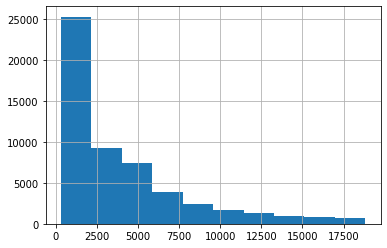

In [3]:
# Import data
df = sns.load_dataset("diamonds")
display(df.head())

target_var = "price"
df[target_var].hist();

Numeric variables:
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

Non-numeric variables:
['cut', 'color', 'clarity']


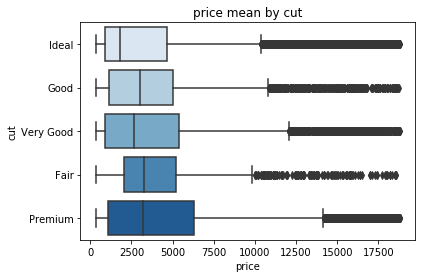

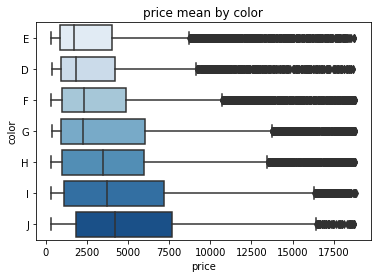

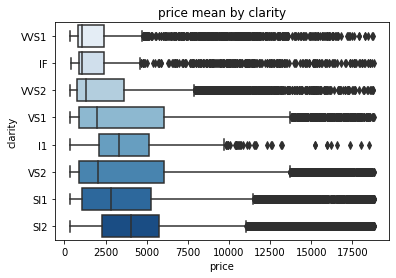

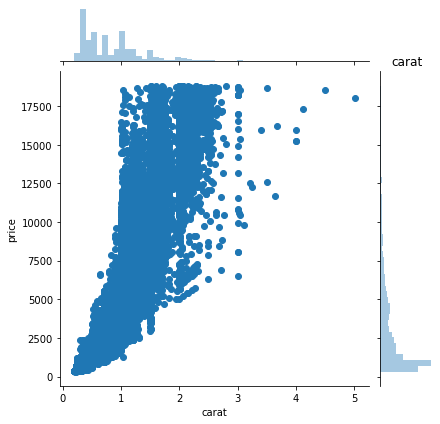

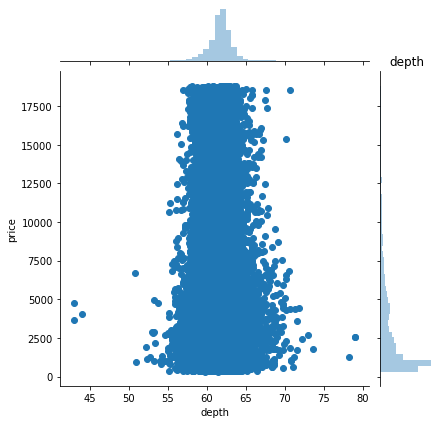

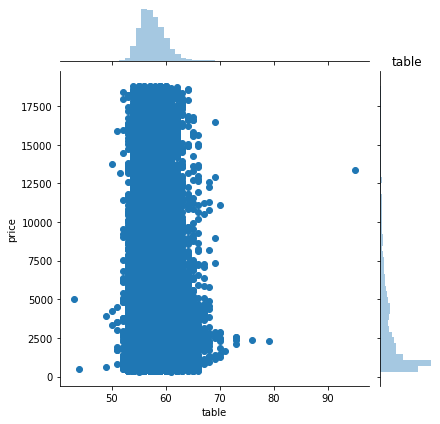

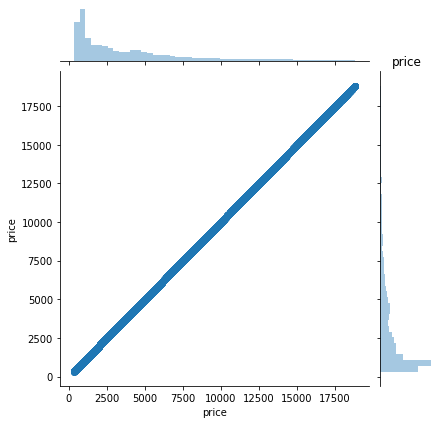

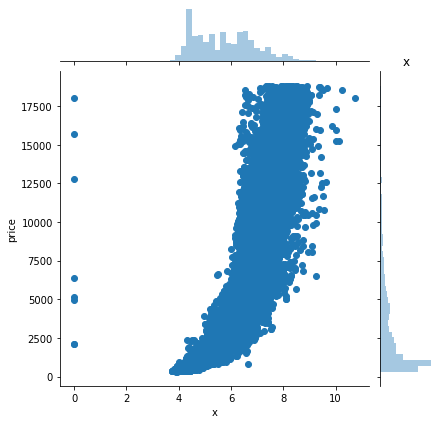

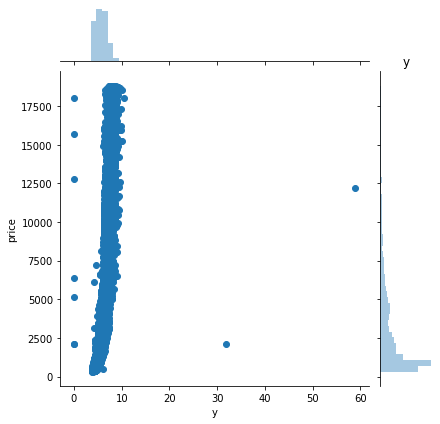

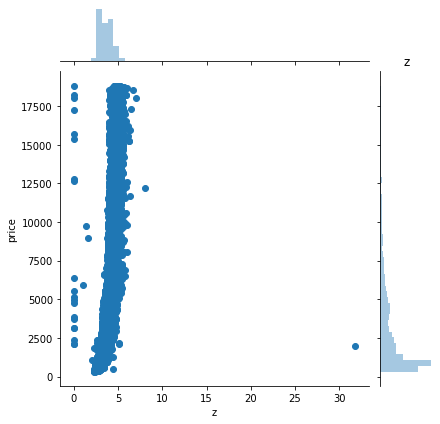

In [4]:
# Visualization
num_var = df.select_dtypes(include=np.number).columns.tolist()
dis_var = [col for col in df.columns if col not in num_var + [target_var]] 
print("Numeric variables:")
print(num_var)
print("\nNon-numeric variables:")
print(dis_var)

# Non-numeric variables
for var in dis_var:
    sns.boxplot(x=target_var, y=var, data=df, palette="Blues", 
               order = df[[var, target_var]].groupby(var).mean().sort_values(target_var).index)
    #df[[var, target_var]].groupby(var).mean().sort_values(target_var).plot(kind = "bar");
    plt.title("{} mean by {}".format(target_var, var))
    plt.show();
    
# Numeric variables
for var in num_var:
    sns.jointplot(x=var, y=target_var, data = df)
    #(sns.jointplot(var, target_var, data=df).plot_joint(sns.kdeplot))
    plt.title(var)
    plt.show();

In [5]:
# One hot encoding
df = pd.get_dummies(df)

# X, y split 
y = df[target_var]
X = df.drop(columns = [target_var])

# Train, test split
from sklearn import model_selection
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X, y, test_size=0.2, 
                                                          random_state=12345)

# Modeling

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [#('StandardScaler', StandardScaler()), # scaling not necessary
         ('LinearRegression', LinearRegression())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred)

,value
mean_squared_error,1199812.86
mean_absolute_error,731.56
median_absolute_error,530.39
max_error,14274.72
explained_variance_score,0.92


### Lasso Regression

In [7]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [#('StandardScaler', StandardScaler()), # scaling not necessary
         ('Lasso', Lasso())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred)

,value
mean_squared_error,1198451.63
mean_absolute_error,730.37
median_absolute_error,529.24
max_error,14162.00
explained_variance_score,0.92


### KNN

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [#('StandardScaler', StandardScaler()), # scaling not necessary
         ('KNeighborsRegressor', KNeighborsRegressor())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred)

,value
mean_squared_error,818165.17
mean_absolute_error,496.46
median_absolute_error,209.30
max_error,9455.20
explained_variance_score,0.95


### Decision Tree / Random Forrest

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('StandardScaler', StandardScaler()),
         ('RandomForestRegressor', RandomForestRegressor())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred)

,value
mean_squared_error,296043.19
mean_absolute_error,267.62
median_absolute_error,98.15
max_error,6301.33
explained_variance_score,0.98


### Xgboost

In [11]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('StandardScaler', StandardScaler()),
         ('XGBRegressor', XGBRegressor())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred)

,value
mean_squared_error,307341.18
mean_absolute_error,283.69
median_absolute_error,115.85
max_error,6096.73
explained_variance_score,0.98


### NN (MLP)

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('StandardScaler', StandardScaler()),
         ('MLPRegressor', MLPRegressor())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred)

/home/julius/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,value
mean_squared_error,579577.73
mean_absolute_error,342.85
median_absolute_error,158.50
max_error,44872.20
explained_variance_score,0.96


# Interpretation

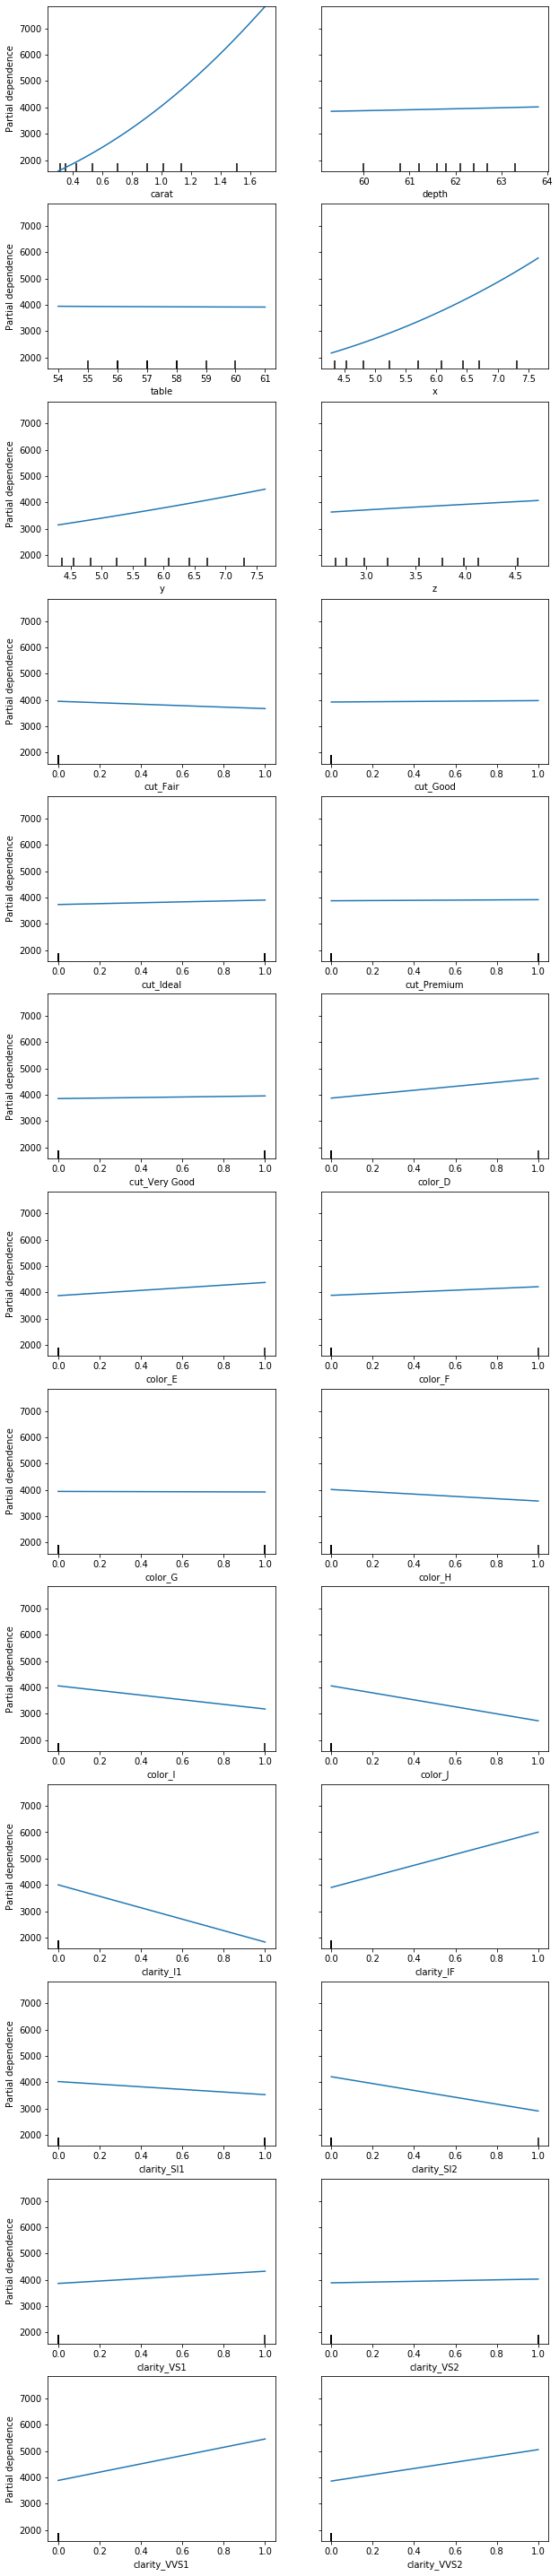

In [24]:
#Interpretation
from sklearn.inspection import plot_partial_dependence
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, X_tr.shape[1]*2)
features = list(range(X_tr.shape[1])) #features = [0, 1, (0, 1)]
plot_partial_dependence(model, X_tr, features, n_cols=2);